In [2]:
%pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:

!pip install openpyxl




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\mahes\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [4]:
import sys
!{sys.executable} -m pip install openpyxl



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import sys
!{sys.executable} -m pip install matplotlib



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import sys
!{sys.executable} -m pip install seaborn



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [127]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [ ]:
df=pd.read_excel("C:/Users/mahes/Downloads/HouseML1.xlsx")

In [9]:
print(df)

              Date      Time Global_active_power Global_reactive_power  \
0       2006-12-16  17:24:00               4.216                 0.418   
1       2006-12-16  17:25:00                5.36                 0.436   
2       2006-12-16  17:26:00               5.374                 0.498   
3       2006-12-16  17:27:00               5.388                 0.502   
4       2006-12-16  17:28:00               3.666                 0.528   
...            ...       ...                 ...                   ...   
1048570 2008-12-13  21:34:00               0.426                 0.076   
1048571 2008-12-13  21:35:00               0.424                 0.076   
1048572 2008-12-13  21:36:00               0.422                 0.076   
1048573 2008-12-13  21:37:00               0.422                 0.078   
1048574 2008-12-13  21:38:00               0.422                 0.078   

        Voltage Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0        234.84             18

In [10]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,2006-12-16,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [11]:
df.shape

(1048575, 9)

In [12]:
#Checking datatypes 
df.dtypes

Date                     datetime64[ns]
Time                             object
Global_active_power              object
Global_reactive_power            object
Voltage                          object
Global_intensity                 object
Sub_metering_1                   object
Sub_metering_2                   object
Sub_metering_3                  float64
dtype: object

In [13]:
#Changing datatypes 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert to datetime
df['Time'] = df['Time'].astype(str)  
cols = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Global_active_power', 
        'Global_reactive_power', 'Voltage', 'Global_intensity']

for col in cols:
    df[col] = df[col].replace('?', np.nan).astype(float)


C:\Users\mahes\AppData\Local\Temp\ipykernel_21852\1472478045.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace('?', np.nan).astype(float)
C:\Users\mahes\AppData\Local\Temp\ipykernel_21852\1472478045.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace('?', np.nan).astype(float)
C:\Users\mahes\AppData\Local\Temp\ipykernel_21852\1472478045.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, expli

In [14]:
df.dtypes

Date                     datetime64[ns]
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Date                   1048575 non-null  datetime64[ns]
 1   Time                   1048575 non-null  object        
 2   Global_active_power    1044506 non-null  float64       
 3   Global_reactive_power  1044506 non-null  float64       
 4   Voltage                1044506 non-null  float64       
 5   Global_intensity       1044506 non-null  float64       
 6   Sub_metering_1         1044506 non-null  float64       
 7   Sub_metering_2         1044506 non-null  float64       
 8   Sub_metering_3         1044506 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 72.0+ MB


In [16]:
df.isnull().sum()

Date                        0
Time                        0
Global_active_power      4069
Global_reactive_power    4069
Voltage                  4069
Global_intensity         4069
Sub_metering_1           4069
Sub_metering_2           4069
Sub_metering_3           4069
dtype: int64

In [17]:
cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
        'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in cols:
    df[col] = df[col].fillna(df[col].mean())



In [18]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
#Describing numerical data 
df.describe()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2007-12-15 07:31:23.412059392,1.108202e+00,1.182732e-01,2.399598e+02,4.718123e+00,1.177451e+00,1.475177e+00,5.933837e+00
min,2006-12-16 00:00:00,7.600000e-02,0.000000e+00,2.234900e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007-06-16 00:00:00,2.880000e-01,0.000000e+00,2.379800e+02,1.200000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2007-12-15 00:00:00,5.560000e-01,9.800000e-02,2.402000e+02,2.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2008-06-14 00:00:00,1.542000e+00,1.860000e-01,2.421400e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2008-12-13 00:00:00,1.067000e+01,1.390000e+00,2.521400e+02,4.640000e+01,8.000000e+01,7.800000e+01,3.100000e+01
std,NaN,1.127352e+00,1.092935e-01,3.278125e+00,4.754337e+00,6.308907e+00,6.340366e+00,8.194452e+00


In [21]:
#describing categorical data 
df.describe(include=[object])

,Time
count,1048575
unique,1440
top,20:24:00
freq,729


In [22]:
#no of unique values 
df.nunique()

Date                      729
Time                     1440
Global_active_power      4076
Global_reactive_power     492
Voltage                  2605
Global_intensity          219
Sub_metering_1             82
Sub_metering_2             80
Sub_metering_3             33
dtype: int64

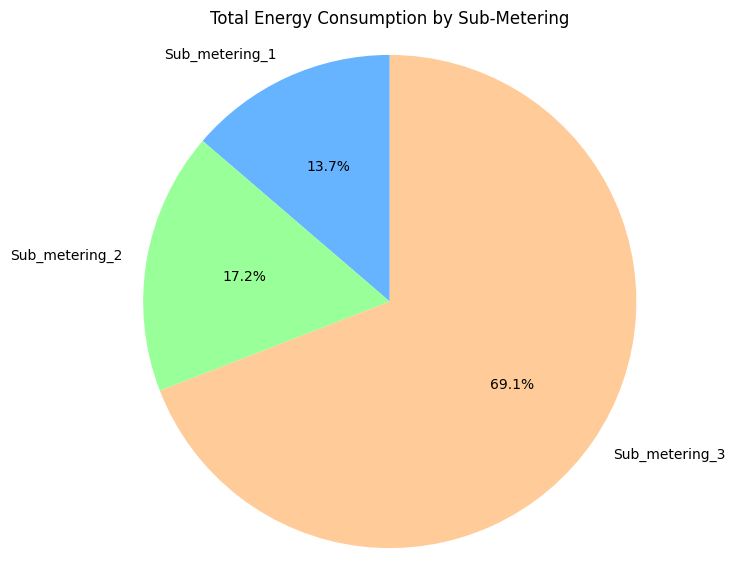

In [23]:
#Pie -Chart
labels = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
values = [
    df['Sub_metering_1'].sum(),
    df['Sub_metering_2'].sum(),
    df['Sub_metering_3'].sum()
]

plt.figure(figsize=(7,7))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Total Energy Consumption by Sub-Metering')
plt.axis('equal')
plt.show()

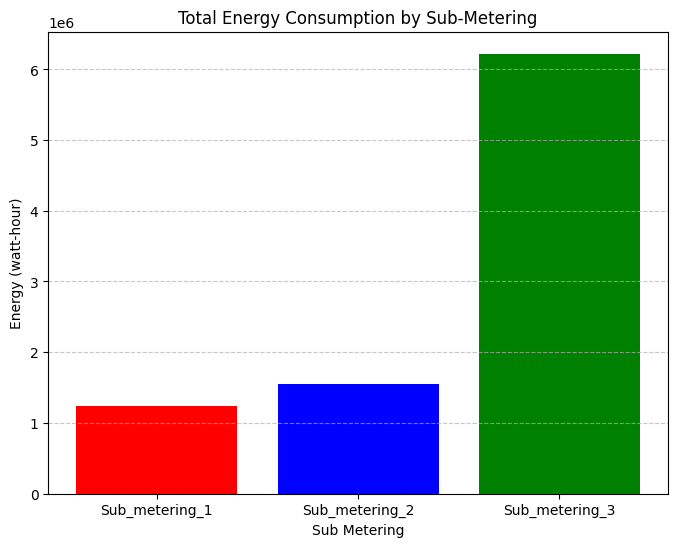

In [24]:
#Bar Chart
categories = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
values = [
    df['Sub_metering_1'].sum(),
    df['Sub_metering_2'].sum(),
    df['Sub_metering_3'].sum()
]

# Use color names
colors = ['red', 'blue', 'green']

plt.figure(figsize=(8,6))
plt.bar(categories, values, color=colors)
plt.title('Total Energy Consumption by Sub-Metering')
plt.xlabel('Sub Metering')
plt.ylabel('Energy (watt-hour)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

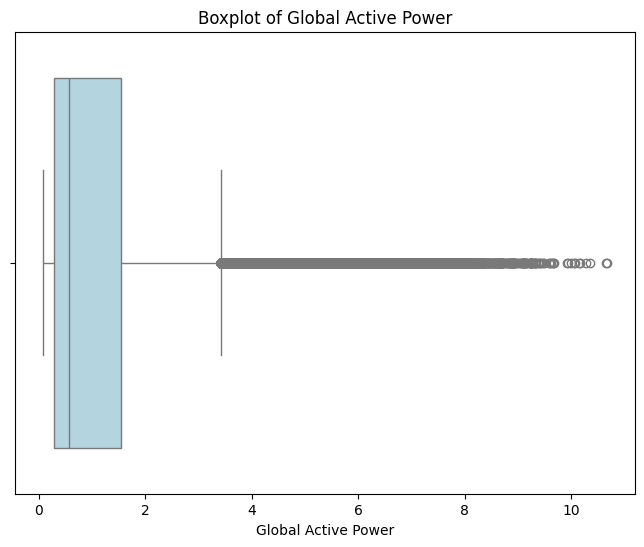

In [25]:
#Detecting Outliers
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Global_active_power'], color='lightblue')
plt.title('Boxplot of Global Active Power')
plt.xlabel('Global Active Power')
plt.show()

In [26]:
#Outliers Using IQR (Interquartile Range)
# Global_active_power
Q1 = df['Global_active_power'].quantile(0.25)
Q3 = df['Global_active_power'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers_gap = df[(df['Global_active_power'] < lower) | (df['Global_active_power'] > upper)]
print(f"Outliers in Global_active_power: {len(outliers_gap)}")

# Global_reactive_power
Q1 = df['Global_reactive_power'].quantile(0.25)
Q3 = df['Global_reactive_power'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers_grp = df[(df['Global_reactive_power'] < lower) | (df['Global_reactive_power'] > upper)]
print(f"Outliers in Global_reactive_power: {len(outliers_grp)}")

# Voltage
Q1 = df['Voltage'].quantile(0.25)
Q3 = df['Voltage'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers_voltage = df[(df['Voltage'] < lower) | (df['Voltage'] > upper)]
print(f"Outliers in Voltage: {len(outliers_voltage)}")

# Global_intensity
Q1 = df['Global_intensity'].quantile(0.25)
Q3 = df['Global_intensity'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers_gi = df[(df['Global_intensity'] < lower) | (df['Global_intensity'] > upper)]
print(f"Outliers in Global_intensity: {len(outliers_gi)}")

# Sub_metering_1
Q1 = df['Sub_metering_1'].quantile(0.25)
Q3 = df['Sub_metering_1'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers_sm1 = df[(df['Sub_metering_1'] < lower) | (df['Sub_metering_1'] > upper)]
print(f"Outliers in Sub_metering_1: {len(outliers_sm1)}")

# Sub_metering_2
Q1 = df['Sub_metering_2'].quantile(0.25)
Q3 = df['Sub_metering_2'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers_sm2 = df[(df['Sub_metering_2'] < lower) | (df['Sub_metering_2'] > upper)]
print(f"Outliers in Sub_metering_2: {len(outliers_sm2)}")

# Sub_metering_3
Q1 = df['Sub_metering_3'].quantile(0.25)
Q3 = df['Sub_metering_3'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers_sm3 = df[(df['Sub_metering_3'] < lower) | (df['Sub_metering_3'] > upper)]
print(f"Outliers in Sub_metering_3: {len(outliers_sm3)}")


Outliers in Global_active_power: 56259
Outliers in Global_reactive_power: 10279
Outliers in Voltage: 14522
Outliers in Global_intensity: 58744
Outliers in Sub_metering_1: 89867
Outliers in Sub_metering_2: 47197
Outliers in Sub_metering_3: 0


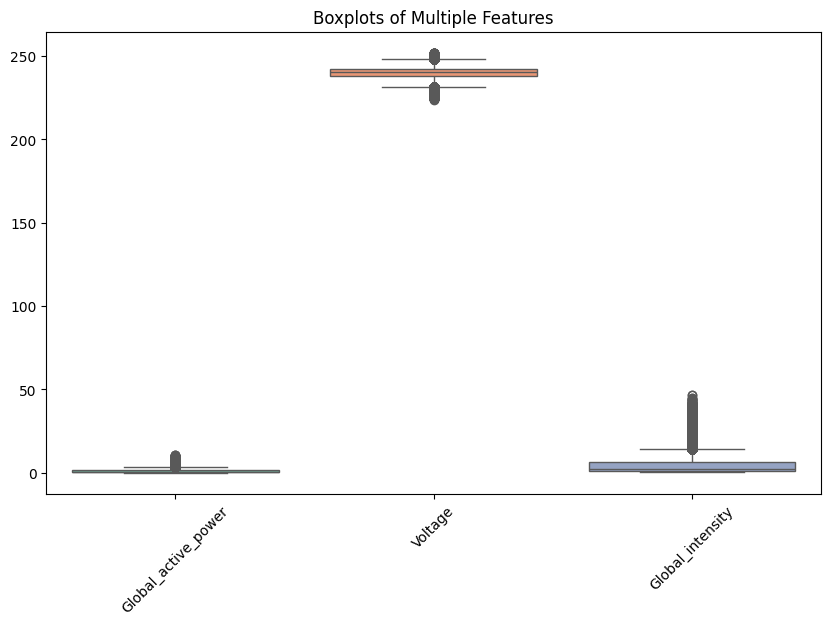

In [27]:
# Multiple boxplots for selected numeric columns
numeric_cols = ['Global_active_power', 'Voltage', 'Global_intensity']
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numeric_cols], palette='Set2')
plt.title('Boxplots of Multiple Features')
plt.xticks(rotation=45)
plt.show()


In [28]:
#Impute Outliers
for col in ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = df[col].median()
    df.loc[(df[col] < lower) | (df[col] > upper), col] = median



In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Date                   1048575 non-null  datetime64[ns]
 1   Time                   1048575 non-null  object        
 2   Global_active_power    1048575 non-null  float64       
 3   Global_reactive_power  1048575 non-null  float64       
 4   Voltage                1048575 non-null  float64       
 5   Global_intensity       1048575 non-null  float64       
 6   Sub_metering_1         1048575 non-null  float64       
 7   Sub_metering_2         1048575 non-null  float64       
 8   Sub_metering_3         1048575 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 72.0+ MB


In [30]:
df['Daily_avgerages'] = df.groupby('Date')['Global_active_power'].transform('mean')

print(df)

              Date      Time  Global_active_power  Global_reactive_power  \
0       2006-12-16  17:24:00                0.556                  0.418   
1       2006-12-16  17:25:00                0.556                  0.436   
2       2006-12-16  17:26:00                0.556                  0.098   
3       2006-12-16  17:27:00                0.556                  0.098   
4       2006-12-16  17:28:00                0.556                  0.098   
...            ...       ...                  ...                    ...   
1048570 2008-12-13  21:34:00                0.426                  0.076   
1048571 2008-12-13  21:35:00                0.424                  0.076   
1048572 2008-12-13  21:36:00                0.422                  0.076   
1048573 2008-12-13  21:37:00                0.422                  0.078   
1048574 2008-12-13  21:38:00                0.422                  0.078   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
0         234.84 

In [31]:
#Rolling averages
df['Rolling_averages'] = df['Global_active_power'].rolling(window=60, min_periods=1).mean()
print(df)

              Date      Time  Global_active_power  Global_reactive_power  \
0       2006-12-16  17:24:00                0.556                  0.418   
1       2006-12-16  17:25:00                0.556                  0.436   
2       2006-12-16  17:26:00                0.556                  0.098   
3       2006-12-16  17:27:00                0.556                  0.098   
4       2006-12-16  17:28:00                0.556                  0.098   
...            ...       ...                  ...                    ...   
1048570 2008-12-13  21:34:00                0.426                  0.076   
1048571 2008-12-13  21:35:00                0.424                  0.076   
1048572 2008-12-13  21:36:00                0.422                  0.076   
1048573 2008-12-13  21:37:00                0.422                  0.078   
1048574 2008-12-13  21:38:00                0.422                  0.078   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
0         234.84 

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Date                   1048575 non-null  datetime64[ns]
 1   Time                   1048575 non-null  object        
 2   Global_active_power    1048575 non-null  float64       
 3   Global_reactive_power  1048575 non-null  float64       
 4   Voltage                1048575 non-null  float64       
 5   Global_intensity       1048575 non-null  float64       
 6   Sub_metering_1         1048575 non-null  float64       
 7   Sub_metering_2         1048575 non-null  float64       
 8   Sub_metering_3         1048575 non-null  float64       
 9   Daily_avgerages        1048575 non-null  float64       
 10  Rolling_averages       1048575 non-null  float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 88.0+ MB


In [33]:
print(df)

              Date      Time  Global_active_power  Global_reactive_power  \
0       2006-12-16  17:24:00                0.556                  0.418   
1       2006-12-16  17:25:00                0.556                  0.436   
2       2006-12-16  17:26:00                0.556                  0.098   
3       2006-12-16  17:27:00                0.556                  0.098   
4       2006-12-16  17:28:00                0.556                  0.098   
...            ...       ...                  ...                    ...   
1048570 2008-12-13  21:34:00                0.426                  0.076   
1048571 2008-12-13  21:35:00                0.424                  0.076   
1048572 2008-12-13  21:36:00                0.422                  0.076   
1048573 2008-12-13  21:37:00                0.422                  0.078   
1048574 2008-12-13  21:38:00                0.422                  0.078   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
0         234.84 

In [ ]:
#Heat Map

In [40]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)

                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.147173 -0.253004   
Global_reactive_power             0.147173               1.000000 -0.094586   
Voltage                          -0.253004              -0.094586  1.000000   
Global_intensity                  0.980613               0.165553 -0.255945   
Sub_metering_1                         NaN                    NaN       NaN   
Sub_metering_2                    0.019147               0.370037 -0.010506   
Sub_metering_3                    0.614988               0.058257 -0.271585   
Daily_avgerages                   0.383836              -0.004236  0.103553   
Rolling_averages                  0.731334               0.093437 -0.238631   

                       Global_intensity  Sub_metering_1  Sub_metering_2  \
Global_active_power            0.980613             NaN        0.019147   
Global_reactive_power          0.165553             NaN    

<Axes: >

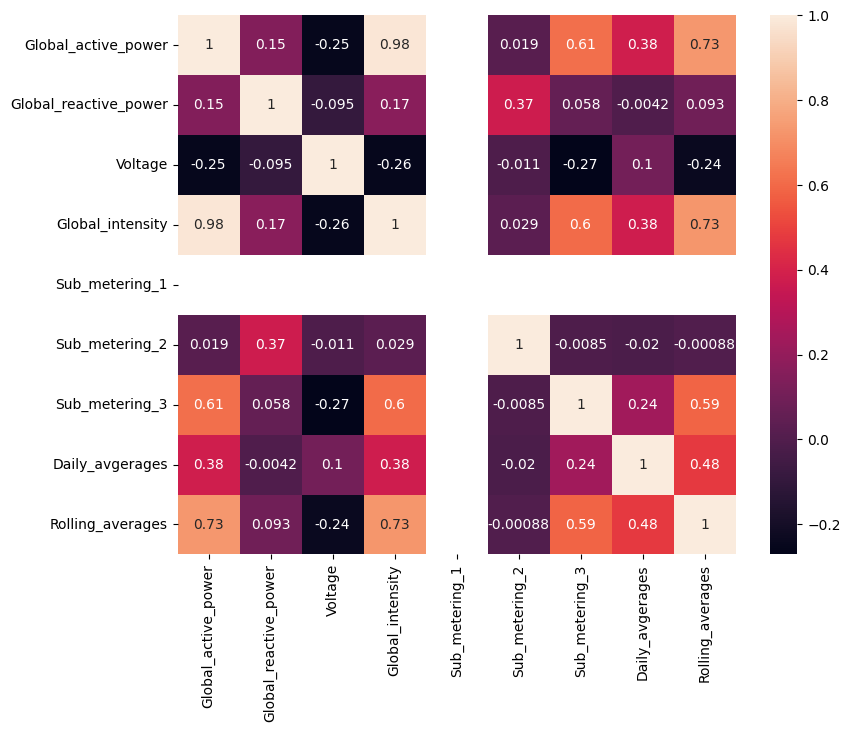

In [42]:
# Heatmap

plt.figure(figsize = (9,7 ))
sns.heatmap(numeric_df.corr(), annot = True)

Data Visualization

Histogram 

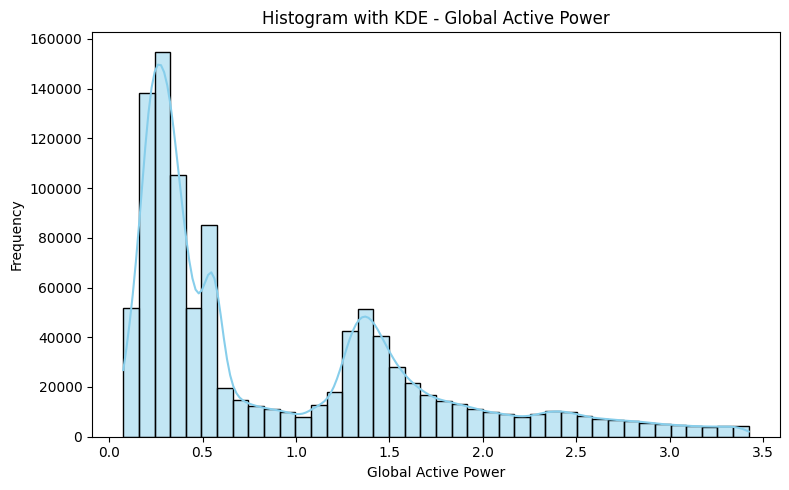

In [61]:
#Global Active Power 
plt.figure(figsize=(8, 5))
sns.histplot(df['Global_active_power'], bins=40, kde=True, color='skyblue')
plt.title('Histogram with KDE - Global Active Power')
plt.xlabel('Global Active Power')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



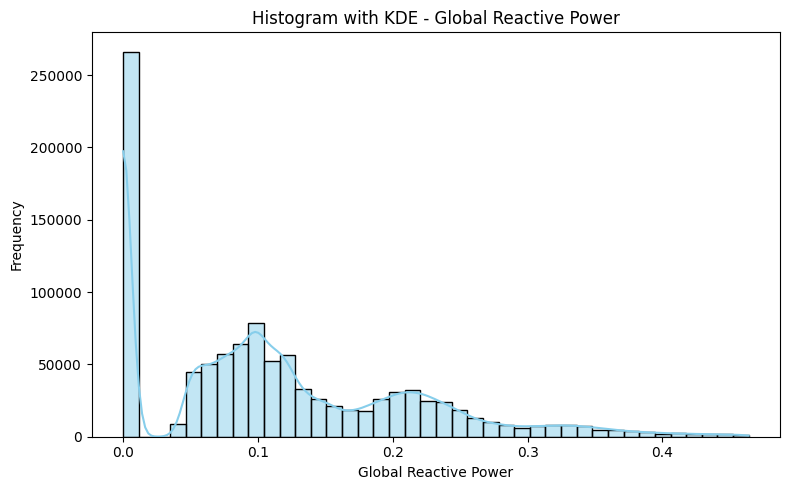

In [62]:
#Global Reactive Power
plt.figure(figsize=(8, 5))
sns.histplot(df['Global_reactive_power'], bins=40, kde=True, color='skyblue')
plt.title('Histogram with KDE - Global Reactive Power')
plt.xlabel('Global Reactive Power')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



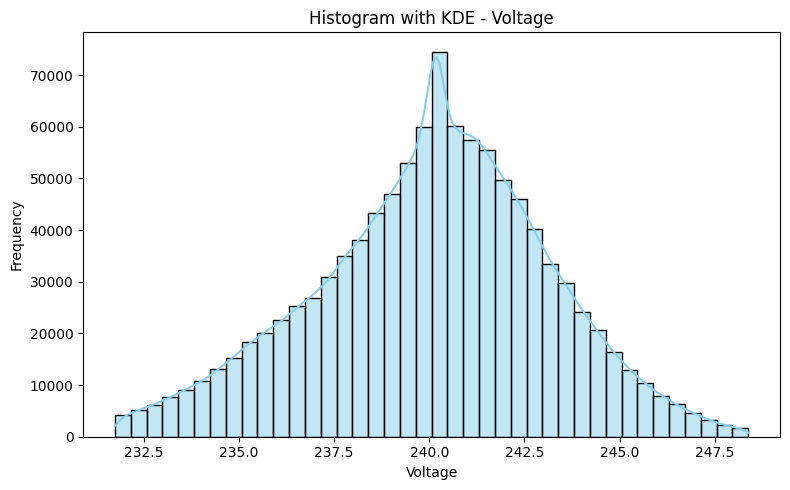

In [63]:
#Voltage
plt.figure(figsize=(8, 5))
sns.histplot(df['Voltage'], bins=40, kde=True, color='skyblue')
plt.title('Histogram with KDE - Voltage')
plt.xlabel('Voltage')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



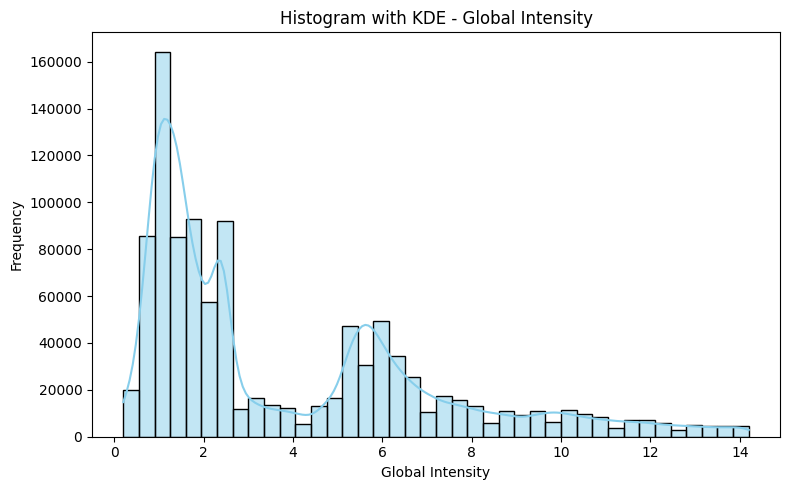

In [64]:
#Global Intensity
plt.figure(figsize=(8, 5))
sns.histplot(df['Global_intensity'], bins=40, kde=True, color='skyblue')
plt.title('Histogram with KDE - Global Intensity')
plt.xlabel('Global Intensity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



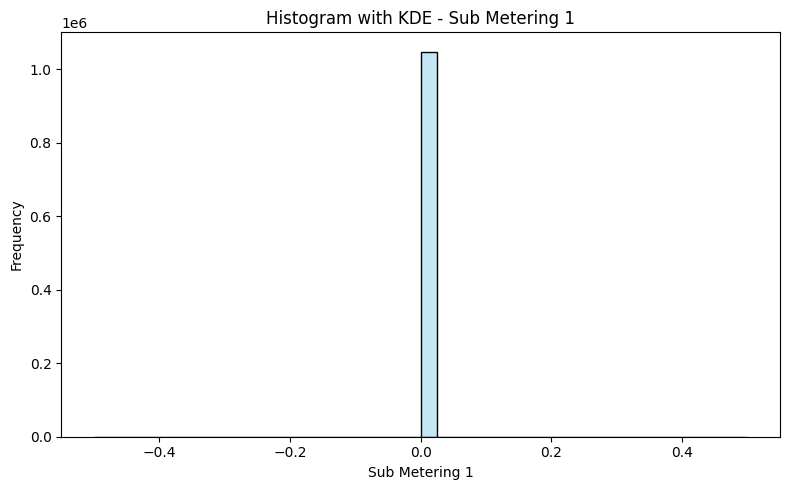

In [65]:
#Sub Metering 1
plt.figure(figsize=(8, 5))
sns.histplot(df['Sub_metering_1'], bins=40, kde=True, color='skyblue')
plt.title('Histogram with KDE - Sub Metering 1')
plt.xlabel('Sub Metering 1')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


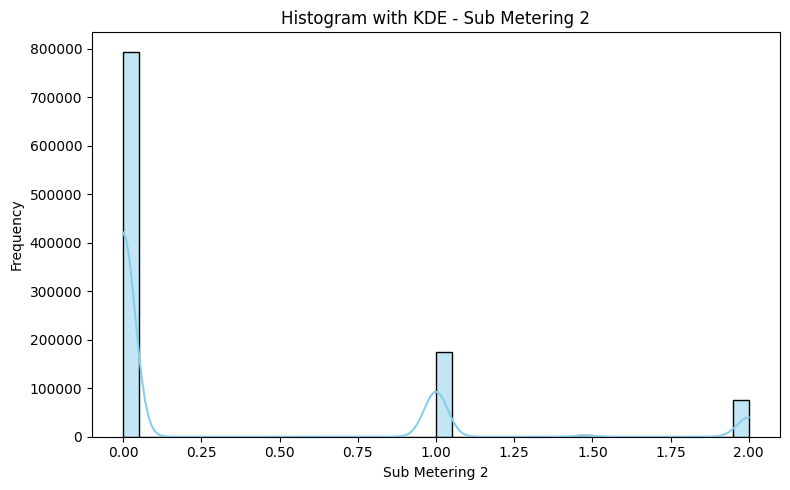

In [66]:
#Sub Metering 2
plt.figure(figsize=(8, 5))
sns.histplot(df['Sub_metering_2'], bins=40, kde=True, color='skyblue')
plt.title('Histogram with KDE - Sub Metering 2')
plt.xlabel('Sub Metering 2')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

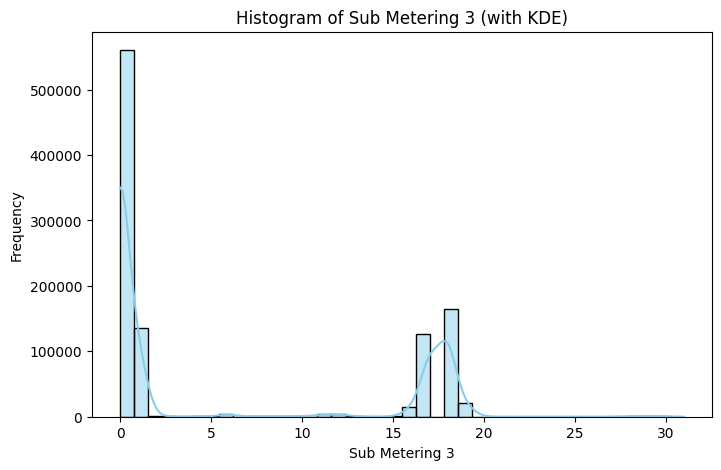

In [67]:
#Sub Metering 3
plt.figure(figsize=(8, 5))
sns.histplot(df['Sub_metering_3'], bins=40, kde=True, color='skyblue')
plt.title('Histogram of Sub Metering 3 (with KDE)')
plt.xlabel('Sub Metering 3')
plt.ylabel('Frequency')
plt.show()


In [71]:
#Model Training and Selection
# Model 1 -> 
# Seperating input features and target variable 
X = df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = df['Global_active_power']


In [ ]:
# Assuming X and y are defined properly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [ ]:
# Assuming X, y defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [80]:
# Taking the predictions from the ML Model 
y_train_pred = lr.predict(X_train)
y_pred = lr.predict(X_test)

In [ ]:
print('Training RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)), 3))
print('Training R2 Score:', np.round(metrics.r2_score(y_train, y_train_pred), 3))
print('Testing RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
print('Testing R2 Score:', np.round(metrics.r2_score(y_test, y_pred), 3))


Training RMSE: 0.154
Training R2 Score: 0.962
Testing RMSE: 0.153
Testing R2 Score: 0.963


In [82]:
# Ridge with low alpha 
rr = Ridge(alpha = 0.01)

# Fitting the model 
rr.fit(X_train, y_train)

Ridge(alpha=0.01)

In [83]:
# Ridge with high alpha 
rr100 = Ridge(alpha = 100)

# Fitting the model 
rr100.fit(X_train, y_train)

Ridge(alpha=100)

In [84]:
# Training and Testing Score (Linear Regression)
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)
print('Training Score :', np.round(train_score, 3))
print('Testing Score :', np.round(test_score, 3))

Training Score : 0.962
Testing Score : 0.963


In [85]:
# Training and Testing Score (Ridge Regression)
rr100_train_score = rr100.score(X_train, y_train)
rr100_test_score = rr100.score(X_test, y_test)
print('Training Score :', np.round(rr100_train_score, 3))
print('Testing Score :', np.round(rr100_test_score, 3))

Training Score : 0.962
Testing Score : 0.963


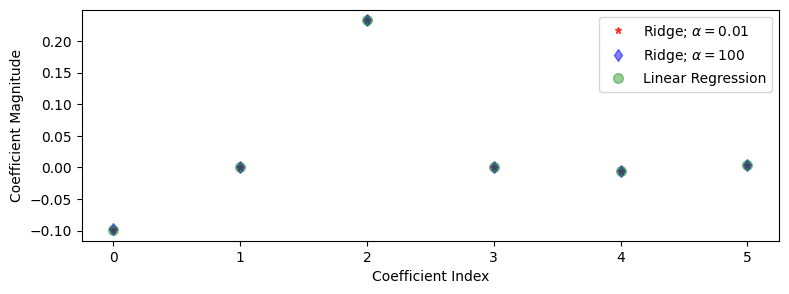

In [86]:
# Plot
plt.figure(figsize = (9, 3))
plt.plot(rr.coef_, alpha = 0.7, linestyle = 'none', marker = '*',
        markersize = 5, color = 'red', label = r'Ridge; $\alpha = 0.01$')
plt.plot(rr100.coef_, alpha = 0.5, linestyle = 'none', marker = 'd',
        markersize = 6, color = 'blue', label = r'Ridge; $\alpha = 100$')
plt.plot(lr.coef_, alpha = 0.4, linestyle = 'none', marker = 'o',
        markersize = 7, color = 'green', label = r'Linear Regression')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend()
plt.show()

In [88]:
#Lasso 
# lasso with low alpha 
lasso = Lasso(alpha = 0.01)

# Fitting the model 
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [89]:
# lasso with low alpha 
lasso10 = Lasso(alpha = 10)

# Fitting the model 
lasso10.fit(X_train, y_train)

Lasso(alpha=10)

In [90]:
# Training and Testing Score
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)
coeff_used = np.sum(lr.coef_ != 0)
print('Training Score :', np.round(train_score, 3))
print('Testing Score :', np.round(test_score, 3))
print('Number of coefficients used :', coeff_used)

Training Score : 0.962
Testing Score : 0.963
Number of coefficients used : 6


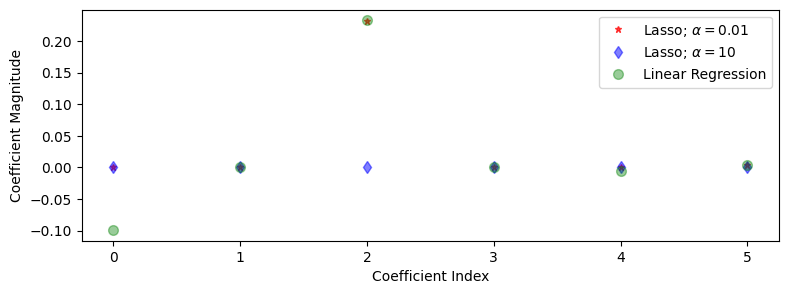

In [95]:
# Plot
plt.figure(figsize = (9, 3))
plt.plot(lasso.coef_, alpha = 0.7, linestyle = 'none', marker = '*',
        markersize = 5, color = 'red', label = r'Lasso; $\alpha = 0.01$')
plt.plot(lasso10.coef_, alpha = 0.5, linestyle = 'none', marker = 'd',
        markersize = 6, color = 'blue', label = r'Lasso; $\alpha = 10$')
plt.plot(lr.coef_, alpha = 0.4, linestyle = 'none', marker = 'o',
        markersize = 7, color = 'green', label = r'Linear Regression')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend()
plt.show()

In [103]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

# Evaluation
print("Linear Regression")
print("Training MSE:", metrics.mean_squared_error(y_train, y_train_pred_lr))
print("Training R²:", metrics.r2_score(y_train, y_train_pred_lr))
print("Testing MSE:", metrics.mean_squared_error(y_test, y_test_pred_lr))
print("Testing R²:", metrics.r2_score(y_test, y_test_pred_lr))


Linear Regression
Training MSE: 0.5179331255246699
Training R²: 0.6125511913966952
Testing MSE: 0.555891598695244
Testing R²: 0.5757877060324511


In [ ]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

# Feature and target separation
X = df.drop("target", axis=1)
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

# Fit the model
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== Model Evaluation ===")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)





=== Model Evaluation ===
Mean Squared Error (MSE): 0.29649278336294826
Root Mean Squared Error (RMSE): 0.544511508935255
R² Score: 0.7737402686595128


In [104]:
# Check training performance of Random Forest
train_pred = rf.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)

print("Training MSE:", train_mse)
print("Training R²:", train_r2)


Training MSE: 0.17119990463537688
Training R²: 0.8719309582356174


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train, predict and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)
    
    results[name] = {
        "Train MSE": train_mse,
        "Train R²": train_r2,
        "Test MSE": test_mse,
        "Test R²": test_r2
    }

# Show results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")
    print()


Linear Regression:
  Train MSE: 0.5179
  Train R²: 0.6126
  Test MSE: 0.5559
  Test R²: 0.5758

Random Forest:
  Train MSE: 0.0353
  Train R²: 0.9736
  Test MSE: 0.2554
  Test R²: 0.8051



In [ ]:
X, y = make_regression(n_samples=1000, n_features=10, noise=10, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

print("Linear Regression Results:")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred_lr):.4f}")
print(f"Train R²: {r2_score(y_train, y_train_pred_lr):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred_lr):.4f}")
print(f"Test R²: {r2_score(y_test, y_test_pred_lr):.4f}\n")

# Random Forest (default parameters)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

print("Random Forest Results (default parameters):")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred_rf):.4f}")
print(f"Train R²: {r2_score(y_train, y_train_pred_rf):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred_rf):.4f}")
print(f"Test R²: {r2_score(y_test, y_test_pred_rf):.4f}\n")

# -------- Hyperparameter tuning with GridSearchCV --------
param_grid = {
    'n_estimators': [100],        
    'max_depth': [10, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=1,        
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation R²: {grid_search.best_score_:.4f}")

best_rf = grid_search.best_estimator_

y_train_pred_best_rf = best_rf.predict(X_train)
y_test_pred_best_rf = best_rf.predict(X_test)

print("\nRandom Forest Results (after tuning):")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred_best_rf):.4f}")
print(f"Train R²: {r2_score(y_train, y_train_pred_best_rf):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred_best_rf):.4f}")
print(f"Test R²: {r2_score(y_test, y_test_pred_best_rf):.4f}")


Linear Regression Results:
Train MSE: 92.6811
Train R²: 0.9947
Test MSE: 95.1191
Test R²: 0.9943

Random Forest Results (default parameters):
Train MSE: 419.0171
Train R²: 0.9761
Test MSE: 2727.0866
Test R²: 0.8373

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation R²: 0.8340

Random Forest Results (after tuning):
Train MSE: 419.1687
Train R²: 0.9761
Test MSE: 2724.3368
Test R²: 0.8375


In [ ]:
''' Model  Selection 
Hence after Model Training with both the model Linear regression and Random Forest,Random Forest is the best model because it has the low Mean Squared Error Value'''



In [118]:
# Performing train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
model = RandomForestRegressor(n_estimators=1000, random_state=5)


In [122]:
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=1000, random_state=5)

In [123]:
#Taking the prediction from the model 
y_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)

In [ ]:
# Training metrics
print("Training Mean Absolute Error (MAE):", np.round(mean_absolute_error(y_train, y_train_pred), 2))
print("Training Mean Squared Error (MSE):", np.round(mean_squared_error(y_train, y_train_pred), 2))
print("Training Root Mean Squared Error (RMSE):", np.round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 2))
print("Training R² Score:", np.round(r2_score(y_train, y_train_pred), 2))

# Testing metrics
print("\nTesting Mean Absolute Error (MAE):", np.round(mean_absolute_error(y_test, y_test_pred), 2))
print("Testing Mean Squared Error (MSE):", np.round(mean_squared_error(y_test, y_test_pred), 2))
print("Testing Root Mean Squared Error (RMSE):", np.round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 2))
print("Testing R² Score:", np.round(r2_score(y_test, y_test_pred), 2))


Training Mean Absolute Error (MAE): 14.79
Training Mean Squared Error (MSE): 376.13
Training Root Mean Squared Error (RMSE): 19.39
Training R² Score: 0.98

Testing Mean Absolute Error (MAE): 40.63
Testing Mean Squared Error (MSE): 2786.58
Testing Root Mean Squared Error (RMSE): 52.79
Testing R² Score: 0.84
